In [3]:
from google.colab import userdata
import os
!pip install kaggle
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset
! unzip "car-vs-bike-classification-dataset.zip" -d "./dataset"

Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset
License(s): CC0-1.0
 98% 101M/103M [00:00<00:00, 275MB/s] 
100% 103M/103M [00:00<00:00, 260MB/s]
Archive:  car-vs-bike-classification-dataset.zip
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1).jpg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1).png  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (10).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (10).jpg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (10).png  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (100).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (100).jpg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1000).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1001).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1002).jpeg  
  inflating: ./dataset/Car-Bike-Dataset/Bike/Bike (1003).jpeg  
  inflating:

In [4]:
from PIL import Image
import os

def convert_images_to_jpg(input_folder, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        # Check if the file is an image
         # Add more extensions as needed
            input_path = os.path.join(input_folder, filename)
            # Remove the original extension and replace it with .jpg
            output_filename = os.path.splitext(filename)[0] + '.jpeg'
            output_path = os.path.join(output_folder, output_filename)

            try:
                # Open the image and convert it to RGB (required for saving as .jpg)
                with Image.open(input_path) as img:
                    img = img.convert('RGB')  # Convert to RGB for JPEG format
                    img.save(output_path, 'JPEG')
                print(f"Converted {filename} to {output_filename}")
            except Exception as e:
                print(f"Failed to convert {filename}: {e}")

# Example usage
input_folder_bike = '/content/dataset/Car-Bike-Dataset/Bike'  # Replace with the path to your input folder
output_folder_bike = '/content/dataset-new/Car-Bike-Dataset/Bike'  # Replace with the path to your output folder

input_folder_cars = '/content/dataset/Car-Bike-Dataset/Car'  # Replace with the path to your input folder
output_folder_cars = '/content/dataset-new/Car-Bike-Dataset/Car'  # Replace with the path to your output folder

convert_images_to_jpg(input_folder_bike, output_folder_bike)
convert_images_to_jpg(input_folder_cars, output_folder_cars)

Converted Bike (1573).jpeg to Bike (1573).jpeg
Converted Bike (637).jpeg to Bike (637).jpeg
Converted Bike (138).jpg to Bike (138).jpeg
Converted Bike (294).jpeg to Bike (294).jpeg
Converted Bike (1612).jpeg to Bike (1612).jpeg
Converted Bike (1303).jpeg to Bike (1303).jpeg
Converted Bike (1175).jpeg to Bike (1175).jpeg
Converted images (123).jpeg to images (123).jpeg
Converted Bike (1436).jpeg to Bike (1436).jpeg
Converted Bike (166).jpg to Bike (166).jpeg
Converted Bike (1290).jpeg to Bike (1290).jpeg
Converted Bike (701).jpeg to Bike (701).jpeg
Converted Bike (1582).jpeg to Bike (1582).jpeg
Converted Bike (519).jpeg to Bike (519).jpeg
Converted Bike (1346).jpeg to Bike (1346).jpeg
Converted Bike (1375).jpeg to Bike (1375).jpeg
Converted image (3).jpeg to image (3).jpeg
Converted Bike (95).jpeg to Bike (95).jpeg
Converted Bike (146).jpeg to Bike (146).jpeg
Converted Bike (183).jpeg to Bike (183).jpeg
Converted Bike (974).jpeg to Bike (974).jpeg
Converted Bike (1422).jpeg to Bike (142

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Converted Bike (124).jpg to Bike (124).jpeg
Converted Bike (1078).jpeg to Bike (1078).jpeg
Converted Bike (1349).jpeg to Bike (1349).jpeg
Converted Bike (1521).jpeg to Bike (1521).jpeg
Converted image (22).jpeg to image (22).jpeg
Converted Bike (1403).jpeg to Bike (1403).jpeg
Converted Bike (62).jpeg to Bike (62).jpeg
Converted Bike (362).jpeg to Bike (362).jpeg
Converted Bike (1617).jpeg to Bike (1617).jpeg
Converted Bike (1433).jpeg to Bike (1433).jpeg
Converted Bike (1541).jpeg to Bike (1541).jpeg
Converted Bike (134).jpg to Bike (134).jpeg
Converted Bike (1113).jpeg to Bike (1113).jpeg
Converted Bike (21).png to Bike (21).jpeg
Converted Bike (115).jpg to Bike (115).jpeg
Converted Bike (774).jpeg to Bike (774).jpeg
Converted Bike (957).jpeg to Bike (957).jpeg
Converted Bike (1540).jpeg to Bike (1540).jpeg
Converted Bike (1287).jpeg to Bike (1287).jpeg
Converted images (127).jpeg to images (127).jpeg
Converted Bike (1158).jpeg to Bike (1158).jpeg
Converted Bike (341).jpeg to Bike (34

In [5]:
import numpy as np
import tensorflow as tf
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset-new/Car-Bike-Dataset",          # Path to the dataset directory
    seed=404,             # Seed for shuffling
    image_size=(224, 224),# Resize images to 224x224
    batch_size=1          # Load images one by one
)

Found 3741 files belonging to 2 classes.


In [7]:
#Convert Dataset to Tensors
x, y = zip(*train_ds)
x = tf.concat(x, axis=0)
y = tf.concat(y, axis=0)

In [8]:
#Split the Data
training_ratio = int(0.8 * len(x))
validation_ratio = int(0.2 * training_ratio)

x_train = x[:training_ratio - validation_ratio]
y_train = y[:training_ratio - validation_ratio]

x_val = x[training_ratio - validation_ratio:training_ratio]
y_val = y[training_ratio - validation_ratio:training_ratio]

x_test = x[int(training_ratio):]
y_test = y[int(training_ratio):]


In [9]:
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (2394, 224, 224, 3)
Validation data shape: (598, 224, 224, 3)
Testing data shape: (749, 224, 224, 3)


In [10]:
#Preprocess the Images
x_train_preprocessed = preprocess_input(x_train)
x_val_preprocessed = preprocess_input(x_val)
x_test_preprocessed = preprocess_input(x_test)

In [11]:
#Load VGG16 Base Model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
#Build the Model
model = Sequential()
for layer in vgg16_base.layers:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False  # Freeze VGG16 layers

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Adjust the number of classes if needed

In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 16,322,530 (62.27 MB)

 Trainable params: 1,607,842 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
!pip install visualkeras
import visualkeras


visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


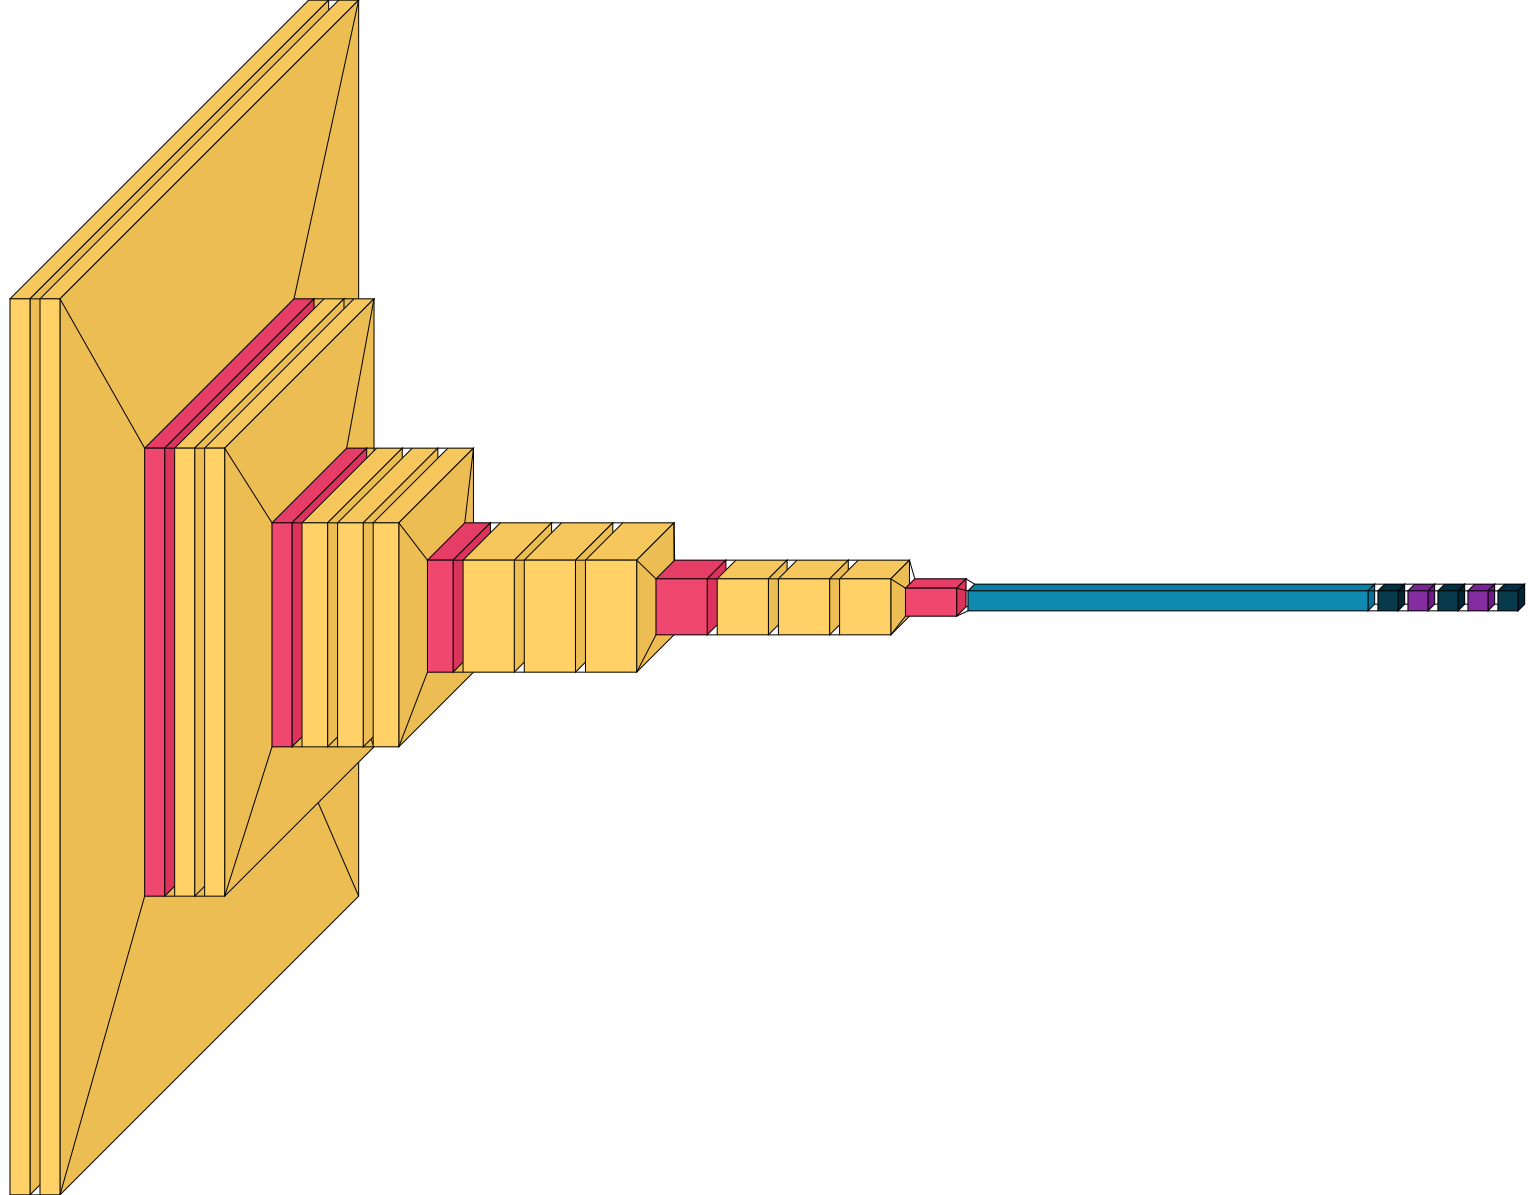

In [16]:
visualkeras.layered_view(model)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    x_train_preprocessed,
    y_train,
    validation_data=(x_val_preprocessed, y_val),
    batch_size=64,
    epochs=10
)



Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7643 - loss: 6.5279 - val_accuracy: 0.9833 - val_loss: 0.1293
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 339ms/step - accuracy: 0.9173 - loss: 1.5505 - val_accuracy: 0.9816 - val_loss: 0.1652
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 354ms/step - accuracy: 0.9440 - loss: 0.9679 - val_accuracy: 0.9866 - val_loss: 0.1966
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 341ms/step - accuracy: 0.9368 - loss: 0.6965 - val_accuracy: 0.9833 - val_loss: 0.1037
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 337ms/step - accuracy: 0.9559 - loss: 0.4601 - val_accuracy: 0.9866 - val_loss: 0.0898
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 343ms/step - accuracy: 0.9611 - loss: 0.3145 - val_accuracy: 0.9833 - val_loss: 0.1695
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 411ms/step - accuracy: 0.9482 - loss: 0.4890 - val_accuracy: 0.9883 - val_loss: 0.0824
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 342ms/step - accuracy: 0.9577 - loss: 0.2036 - val_accurac

In [ ]:
# If y_test or predicted_classes is a TensorFlow tensor
import numpy as np

y_test_cpu = np.array(y_test)  # Convert y_test to a NumPy array
predicted_classes_cpu = np.array(predicted_classes)  # Convert predicted_classes to a NumPy array

accuracy = accuracy_score(y_test_cpu, predicted_classes_cpu)
print("Accuracy:", accuracy)


Accuracy: 0.9946595460614153


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step
Accuracy: 0.9946595460614153
Confusion Matrix:
[[338   1]
 [  3 407]]


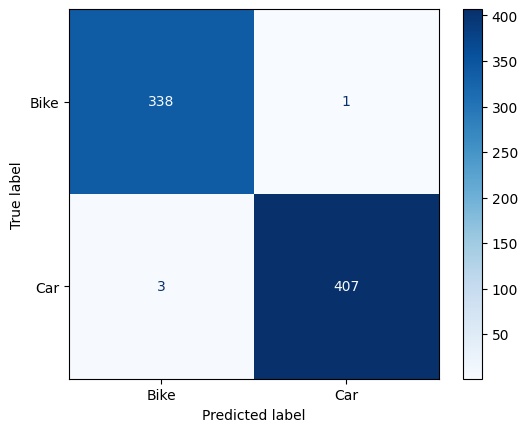

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Predict classes
Y_pred = model.predict(x_test_preprocessed)
predicted_classes = Y_pred.argmax(axis=1)

# Calculate accuracy
y_test_cpu = np.array(y_test)  # Convert y_test to a NumPy array
predicted_classes_cpu = np.array(predicted_classes)  # Convert predicted_classes to a NumPy array

accuracy = accuracy_score(y_test_cpu, predicted_classes_cpu)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bike","Car"])  # Replace with your class labels if available
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import kagglehub
import shutil

Confusion Matrix:
 [[338   1]
 [  3 407]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       339
           1       1.00      0.99      1.00       410

    accuracy                           0.99       749
   macro avg       0.99      0.99      0.99       749
weighted avg       0.99      0.99      0.99       749



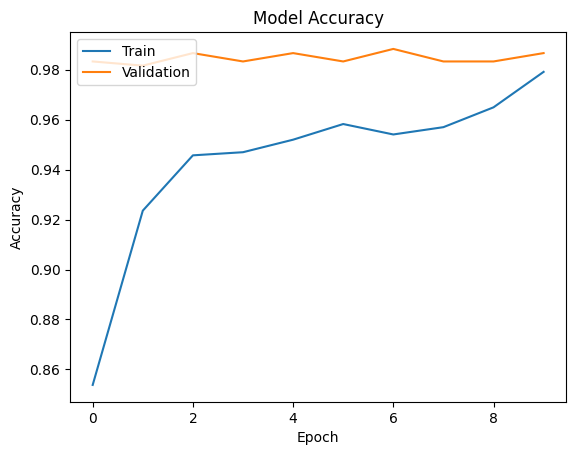

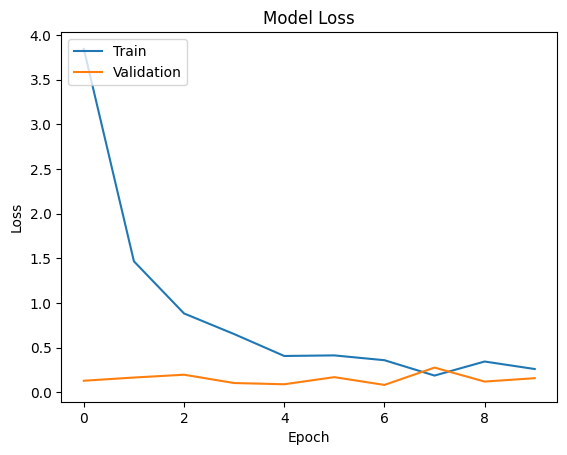

In [ ]:
# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, predicted_classes)
print("Classification Report:\n", cr)

#  Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Apply Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

# Use the augmented data generator
train_ds_augmented = train_datagen.flow(x_train, y_train, batch_size=64)

# Update model.fit to use augmented data
history = model.fit(
    train_ds_augmented,
    validation_data=(x_val_preprocessed, y_val),
    epochs=10,  # Increase epochs to test early stopping
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 771ms/step - accuracy: 0.9228 - loss: 0.1975 - val_accuracy: 0.9916 - val_loss: 0.0435
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 764ms/step - accuracy: 0.9249 - loss: 0.1712 - val_accuracy: 0.9883 - val_loss: 0.0283
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 733ms/step - accuracy: 0.9279 - loss: 0.1379 - val_accuracy: 0.9883 - val_loss: 0.0277
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 776ms/step - accuracy: 0.9124 - loss: 0.1656 - val_accuracy: 0.9900 - val_loss: 0.0650
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 823ms/step - accuracy: 0.9230 - loss: 0.1449 - val_accuracy: 0.9916 - val_loss: 0.0295
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 742ms/step - accuracy: 0.9362 - loss: 0.1221 - val_accuracy: 0.9866 - val_loss: 0.0289
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 835ms/step - accuracy: 0.9102 - loss: 0.2465 - val_accuracy: 0.9916 - val_loss: 0.0202
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 760ms/step - accuracy: 0.9282 - loss: 0.1178 - val_accu

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True )

# Train the model with early stopping
history = model.fit(
    train_ds_augmented,
    validation_data=(x_val_preprocessed, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping]
)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 768ms/step - accuracy: 0.9182 - loss: 0.1418 - val_accuracy: 0.9866 - val_loss: 0.0565
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 770ms/step - accuracy: 0.9252 - loss: 0.2595 - val_accuracy: 0.9849 - val_loss: 0.1181
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 827ms/step - accuracy: 0.9566 - loss: 0.1385 - val_accuracy: 0.9916 - val_loss: 0.0469
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 743ms/step - accuracy: 0.9436 - loss: 0.0923 - val_accuracy: 0.9916 - val_loss: 0.0333
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 827ms/step - accuracy: 0.9583 - loss: 0.0865 - val_accuracy: 0.9900 - val_loss: 0.0602
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 824ms/step - accuracy: 0.9377 - loss: 0.1041 - val_accuracy: 0.9916 - val_loss: 0.0787
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 822ms/step - accuracy: 0.9421 - loss: 0.0992 - val_accuracy: 0.9916 - val_loss: 0.0433
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 753ms/step - accuracy: 0.9437 - loss: 0.1138 - val_accu

In [ ]:
# Add more dropout layers
model = Sequential()
for layer in vgg16_base.layers:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False  # Freeze VGG16 layers

model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Increase neuron count
model.add(Dropout(0.5))  # Add dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Add another dropout
model.add(Dense(2, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.0001, decay=1e-6),  # Add weight decay
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# Unfreeze the last few layers of VGG16
for layer in vgg16_base.layers[-4:]:
    layer.trainable = True


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Add learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(
    train_ds_augmented,
    validation_data=(x_val_preprocessed, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 990ms/step - accuracy: 0.6568 - loss: 2.3690 - val_accuracy: 0.9799 - val_loss: 0.0725 - learning_rate: 1.0000e-04
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 891ms/step - accuracy: 0.9197 - loss: 0.2659 - val_accuracy: 0.9732 - val_loss: 0.0735 - learning_rate: 1.0000e-04
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 785ms/step - accuracy: 0.9354 - loss: 0.1706 - val_accuracy: 0.9799 - val_loss: 0.0608 - learning_rate: 1.0000e-04
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 863ms/step - accuracy: 0.9650 - loss: 0.1106 - val_accuracy: 0.9849 - val_loss: 0.0547 - learning_rate: 1.0000e-04
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 779ms/step - accuracy: 0.9742 - loss: 0.0800 - val_accuracy: 0.9849 - val_loss: 0.0506 - learning_rate: 1.0000e-04


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step
Accuracy: 0.9799732977303071
Confusion Matrix:
[[334   5]
 [ 10 400]]


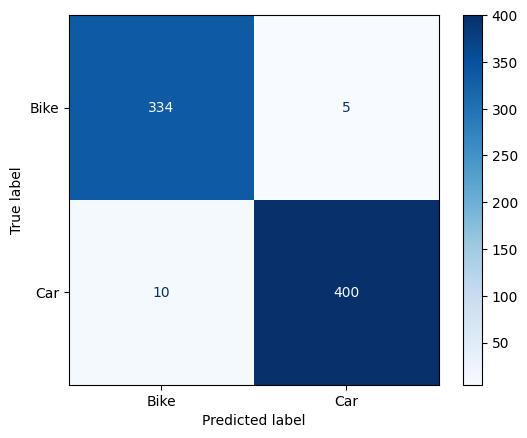

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Predict classes
Y_pred = model.predict(x_test_preprocessed)
predicted_classes = Y_pred.argmax(axis=1)

# Calculate accuracy
y_test_cpu = np.array(y_test)  # Convert y_test to a NumPy array
predicted_classes_cpu = np.array(predicted_classes)  # Convert predicted_classes to a NumPy array

accuracy = accuracy_score(y_test_cpu, predicted_classes_cpu)
print("Accuracy:", accuracy)

# Generate confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bike","Car"])  # Replace with your class labels if available
disp.plot(cmap=plt.cm.Blues)
plt.show()

Confusion Matrix:
 [[334   5]
 [ 10 400]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       339
           1       0.99      0.98      0.98       410

    accuracy                           0.98       749
   macro avg       0.98      0.98      0.98       749
weighted avg       0.98      0.98      0.98       749



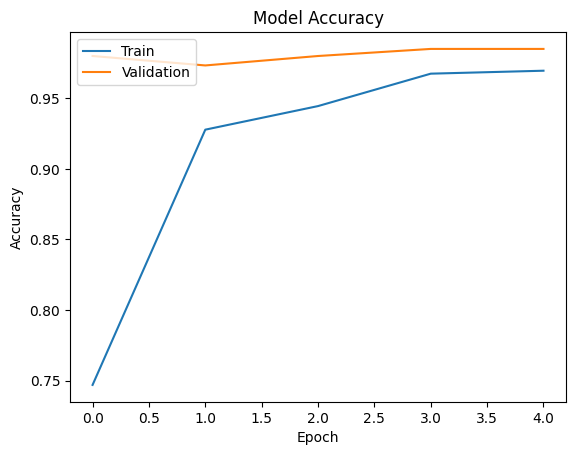

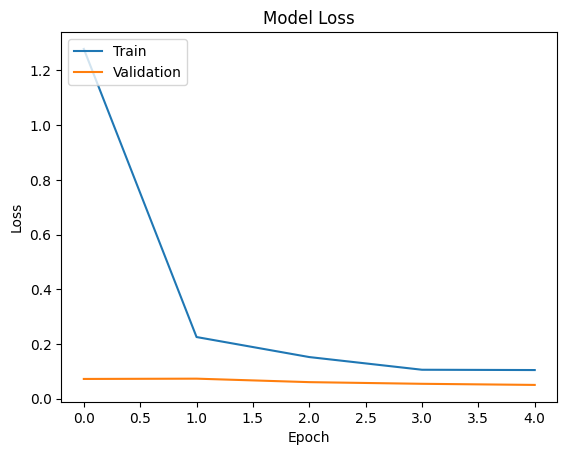

In [ ]:
# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, predicted_classes)
print("Classification Report:\n", cr)

#  Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()